# Аналитика образовательной эффективности курса

Этот notebook позволяет анализировать ведомости оценок курса и рассчитывать метрики:
- **Метрика** Завершенность и активность
- **Метрика** Успеваемость
- **Метрика** Качество обучения
- **Метрика** Сравнительные метрики


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from course_analytics import CourseAnalytics

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

In [17]:
COURSE_CONFIG = {
    "excel_path": "Алгоритмы и структуры данных I.xlsx",
}

analytics = CourseAnalytics(config=COURSE_CONFIG)

summary = analytics.get_summary()
print("СВОДНАЯ ИНФОРМАЦИЯ О КУРСЕ")
print("=" * 50)
for key, value in summary.items():
    print(f"{key}: {value}")

СВОДНАЯ ИНФОРМАЦИЯ О КУРСЕ
Количество студентов: 222
Количество работ: 12
Работ до учета: None


In [18]:
sources_df = analytics.describe_sources()
if not sources_df.empty:
    display(sources_df)
else:
    print("Нет данных об активностях. Проверьте конфигурацию курса.")

,Активность,Тип,Количество столбцов,Агрегация,Источники
0,Неделя 1. Понятие алгоритма. Оценка трудоемкос...,homework,1,single,Неделя 1. Понятие алгоритма. Оценка трудоемкос...
1,Неделя 2. Рекуррентные соотношения. Мастер-тео...,homework,1,single,Неделя 2. Рекуррентные соотношения. Мастер-тео...
2,Неделя 3. Алгоритмы со сложностью O(n),homework,1,single,Неделя 3. Алгоритмы со сложностью O(n)
3,Неделя 4. Фундаментальные алгоритмы теории чисел,homework,1,single,Неделя 4. Фундаментальные алгоритмы теории чисел
4,Семинары,other,1,single,Семинары
5,Неделя 5. Бинарный поиск,homework,1,single,Неделя 5. Бинарный поиск
6,Неделя 6. Контрольная работа,control,1,single,Неделя 6. Контрольная работа
7,Задание,other,6,single,Задание
8,Неделя 7. Базовые сортировки,homework,1,single,Неделя 7. Базовые сортировки
9,Неделя 8. Эффективные алгоритмы сортировки,homework,1,single,Неделя 8. Эффективные алгоритмы сортировки


## МЕТРИКА 1: Завершенность и активность

### Процент завершения по каждому типу заданий


ПРОЦЕНТ ЗАВЕРШЕНИЯ ПО ТИПАМ ЗАДАНИЙ
                                                                 Работа  Выполнили  Всего   Процент Тип работы
Неделя 1. Понятие алгоритма. Оценка трудоемкости алгоритма. Асимптотика        203    222 91.441441   homework
                     Неделя 2. Рекуррентные соотношения. Мастер-теорема        197    222 88.738739   homework
                                           Неделя 6. Контрольная работа        195    222 87.837838    control
                                 Неделя 3. Алгоритмы со сложностью O(n)        175    222 78.828829   homework
                                           Неделя 7. Базовые сортировки        171    222 77.027027   homework
                       Неделя 4. Фундаментальные алгоритмы теории чисел        167    222 75.225225   homework
                                               Неделя 5. Бинарный поиск        160    222 72.072072   homework
                             Неделя 8. Эффективные алгоритмы сортировки     

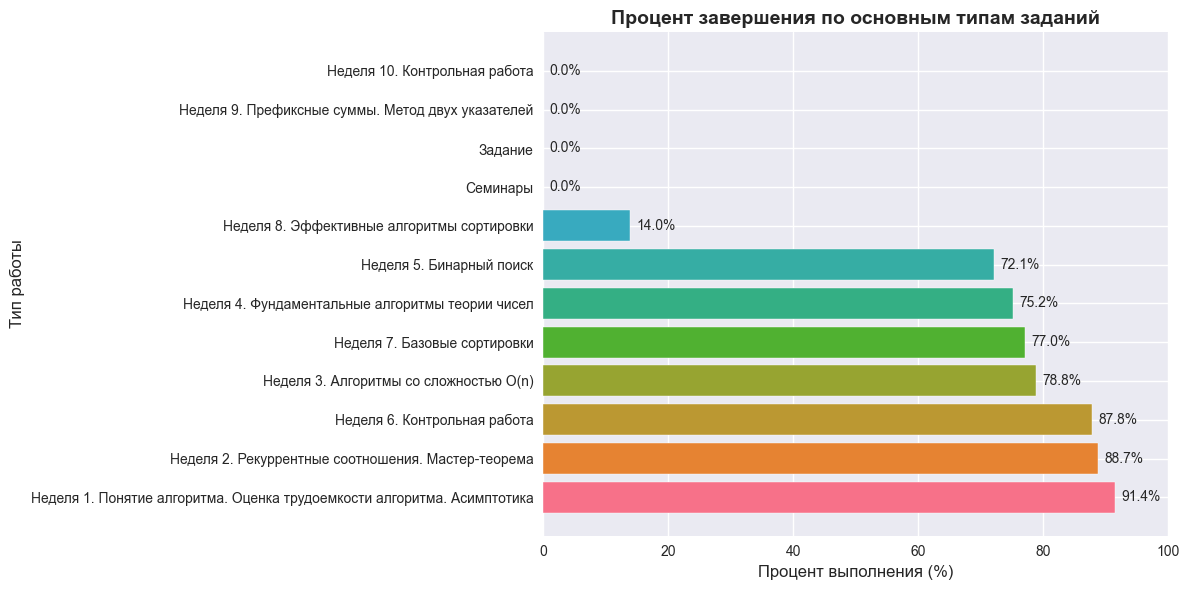


ПРОЦЕНТ ЗАВЕРШЕНИЯ ПО КАЖДОМУ ОТДЕЛЬНОМУ ЗАДАНИЮ
                                                                 Работа  Выполнили  Всего   Процент Тип работы
                                           Неделя 6. Контрольная работа        195    222 87.837838    control
                                          Неделя 10. Контрольная работа          0    222  0.000000    control
Неделя 1. Понятие алгоритма. Оценка трудоемкости алгоритма. Асимптотика        203    222 91.441441   homework
                     Неделя 2. Рекуррентные соотношения. Мастер-теорема        197    222 88.738739   homework
                                 Неделя 3. Алгоритмы со сложностью O(n)        175    222 78.828829   homework
                       Неделя 4. Фундаментальные алгоритмы теории чисел        167    222 75.225225   homework
                                               Неделя 5. Бинарный поиск        160    222 72.072072   homework
                                           Неделя 7. Базовые с

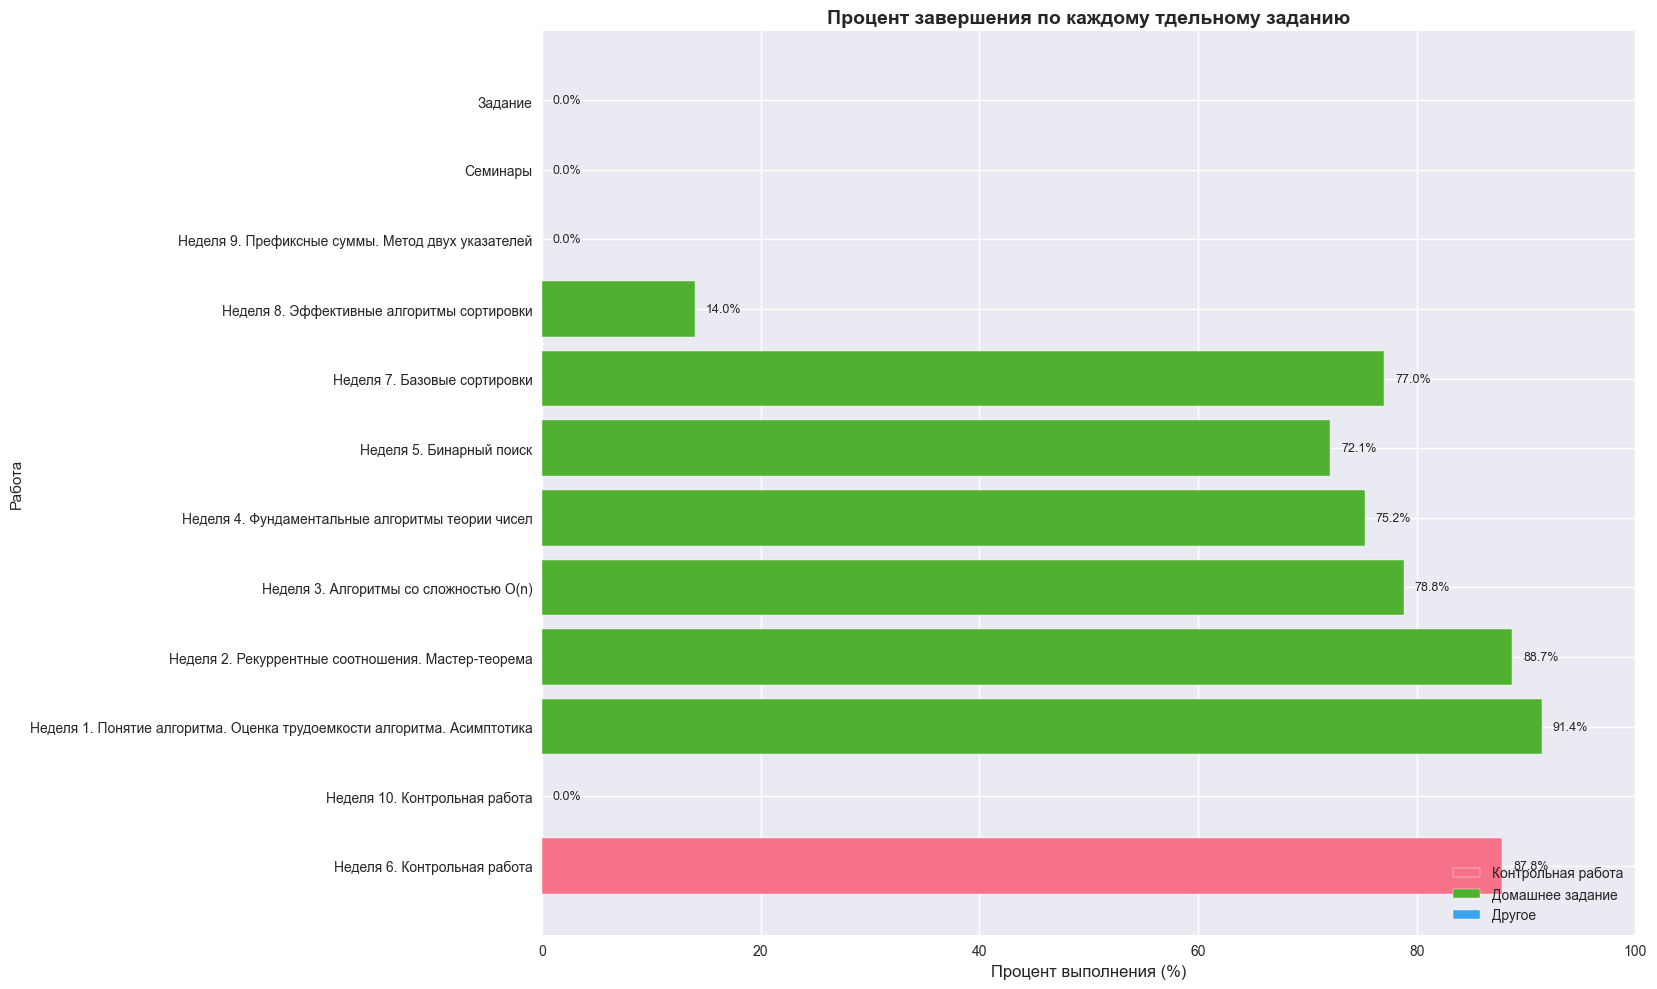

In [19]:
completion_df = analytics.get_completion_rates()

print("ПРОЦЕНТ ЗАВЕРШЕНИЯ ПО ТИПАМ ЗАДАНИЙ")
print("=" * 60)
print(completion_df.to_string(index=False))

# Визуализация 1: По типам заданий
fig, ax = plt.subplots(figsize=(12, 6))
colors = sns.color_palette("husl", len(completion_df))
bars = ax.barh(completion_df['Работа'], completion_df['Процент'], color=colors)
ax.set_xlabel('Процент выполнения (%)', fontsize=12)
ax.set_ylabel('Тип работы', fontsize=12)
ax.set_title('Процент завершения по основным типам заданий', fontsize=14, fontweight='bold')
ax.set_xlim(0, 100)

for i, (bar, pct) in enumerate(zip(bars, completion_df['Процент'])):
    ax.text(pct + 1, i, f'{pct:.1f}%', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Каждое задание (включая бонусные)
completion_individual_df = analytics.get_completion_rates_by_individual_works()

print("\n" + "=" * 60)
print("ПРОЦЕНТ ЗАВЕРШЕНИЯ ПО КАЖДОМУ ОТДЕЛЬНОМУ ЗАДАНИЮ")
print("=" * 60)
print(completion_individual_df.to_string(index=False))

# Визуализация 2: По каждой отдельной работе
fig, ax = plt.subplots(figsize=(16, max(10, len(completion_individual_df) * 0.4)))

# Цвета по типам работ
available_types = completion_individual_df['Тип работы'].unique().tolist()
ordered_types = [t for t in getattr(analytics, 'type_order', []) if t in available_types]
for t in available_types:
    if t not in ordered_types:
        ordered_types.append(t)

palette = sns.color_palette("husl", len(ordered_types))
color_map = {t: palette[idx] for idx, t in enumerate(ordered_types)}
label_map = {
    t: analytics.activity_classifier.get(t, {}).get('label', t.capitalize())
    for t in ordered_types
}

colors = [color_map.get(work_type, '#6C757D')
          for work_type in completion_individual_df['Тип работы']]

bars = ax.barh(completion_individual_df['Работа'], completion_individual_df['Процент'], color=colors)
ax.set_xlabel('Процент выполнения (%)', fontsize=12)
ax.set_ylabel('Работа', fontsize=11)
ax.set_title('Процент завершения по каждому тдельному заданию',
             fontsize=14, fontweight='bold')
ax.set_xlim(0, 100)

for i, (bar, pct) in enumerate(zip(bars, completion_individual_df['Процент'])):
    ax.text(pct + 1, i, f'{pct:.1f}%', va='center', fontsize=9)

# Легенда
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=color_map[t], label=label_map.get(t, t.capitalize()))
    for t in ordered_types
    if t in completion_individual_df['Тип работы'].values
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=10)

plt.tight_layout()
plt.subplots_adjust(left=0.3)
plt.show()


### Траектория вовлеченности студентов (по реперным точкам)


ТРАЕКТОРИЯ ВОВЛЕЧЕННОСТИ ПО ОСНОВНЫМ ЗАДАНИЯМ
                       Работа   Процент  Выполнили  Всего  Порядок
 Неделя 6. Контрольная работа 87.837838        195    222        1
Неделя 10. Контрольная работа  0.000000          0    222        2


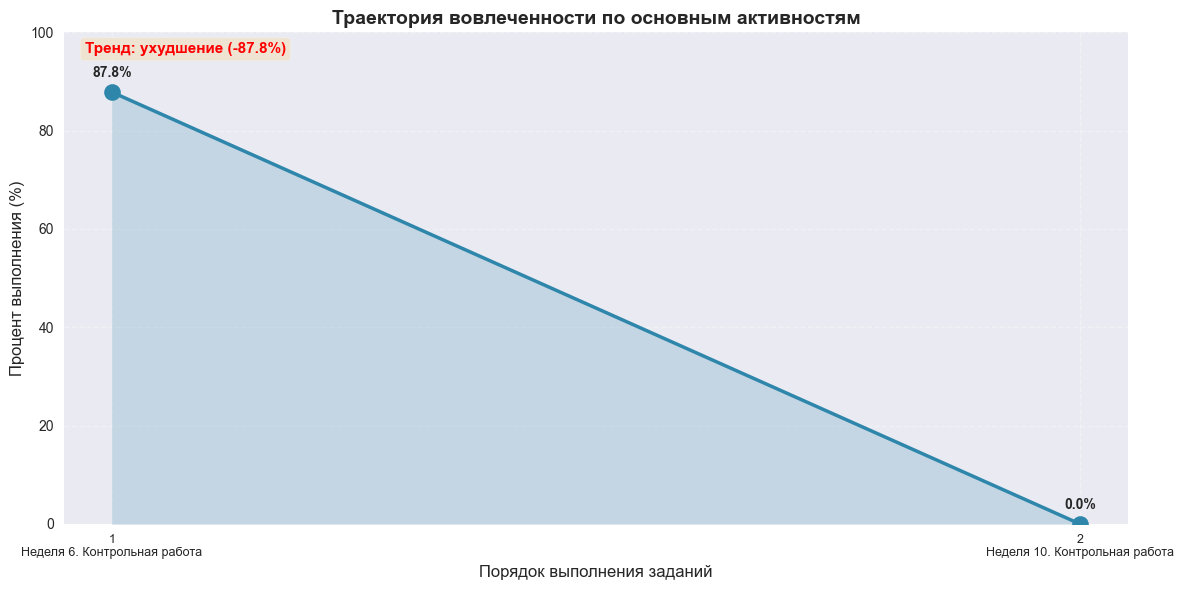


ТОЧКА ОТСЕВА: Неделя 10. Контрольная работа
   Падение вовлеченности: 87.8%
   До: 87.8% → После: 0.0%
Недостаточно данных для анализа траектории по бонусным активностям


In [20]:
trajectory_main_df = analytics.get_engagement_trajectory()

if len(trajectory_main_df) > 0:
    print("ТРАЕКТОРИЯ ВОВЛЕЧЕННОСТИ ПО ОСНОВНЫМ ЗАДАНИЯМ")
    print("=" * 60)
    print(trajectory_main_df.to_string(index=False))
    
    # Визуализация 1: По основным заданиям
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(trajectory_main_df['Порядок'], trajectory_main_df['Процент'], 
            marker='o', linewidth=2.5, markersize=12, color='#2E86AB', label='Вовлеченность')
    ax.fill_between(trajectory_main_df['Порядок'], trajectory_main_df['Процент'], alpha=0.2, color='#2E86AB')

    ax.set_xticks(trajectory_main_df['Порядок'])
    ax.set_xticklabels([f"{i}\n{row['Работа'][:30]}..." if len(row['Работа']) > 30 else f"{i}\n{row['Работа']}" 
                        for i, (_, row) in enumerate(trajectory_main_df.iterrows(), 1)], 
                       fontsize=9, rotation=0, ha='center')
    
    ax.set_xlabel('Порядок выполнения заданий', fontsize=12)
    ax.set_ylabel('Процент выполнения (%)', fontsize=12)
    ax.set_title('Траектория вовлеченности по основным активностям', 
                 fontsize=14, fontweight='bold')
    ax.set_ylim(0, 100)
    ax.grid(True, alpha=0.3, linestyle='--')
    
    # Добавляем значения на график
    for idx, row in trajectory_main_df.iterrows():
        ax.text(row['Порядок'], row['Процент'] + 3, 
                f"{row['Процент']:.1f}%", 
                ha='center', fontsize=10, fontweight='bold')

    if len(trajectory_main_df) >= 2:
        first_pct = trajectory_main_df.iloc[0]['Процент']
        last_pct = trajectory_main_df.iloc[-1]['Процент']
        trend = last_pct - first_pct
        trend_text = "улучшение" if trend > 0 else ("ухудшение" if trend < 0 else "стабильно")
        trend_color = "green" if trend > 0 else ("red" if trend < 0 else "gray")
        ax.text(0.02, 0.98, f"Тренд: {trend_text} ({trend:+.1f}%)", 
                transform=ax.transAxes, fontsize=11, 
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                color=trend_color, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Анализ точки отсева
    dropout = analytics.get_dropout_point()
    if dropout.get('point_found'):
        print(f"\nТОЧКА ОТСЕВА: {dropout['work']}")
        print(f"   Падение вовлеченности: {dropout['drop_percentage']:.1f}%")
        if dropout['before']:
            print(f"   До: {dropout['before']:.1f}% → После: {dropout['after']:.1f}%")
else:
    print("Недостаточно данных для анализа траектории по основным работам")

# Получаем траекторию по бонусным активностям
trajectory_bonus_df = analytics.get_bonus_engagement_trajectory()

if len(trajectory_bonus_df) > 0:
    print("\n" + "=" * 60)
    print("📊 ТРАЕКТОРИЯ ВОВЛЕЧЕННОСТИ ПО БОНУСНЫМ АКТИВНОСТЯМ")
    print("=" * 60)
    print(trajectory_bonus_df.to_string(index=False))
    
    # Визуализация 2: По бонусным активностям
    fig, ax = plt.subplots(figsize=(14, 6))
    ax.plot(trajectory_bonus_df['Порядок'], trajectory_bonus_df['Процент'], 
            marker='s', linewidth=2, markersize=10, color='#F18F01', label='Вовлеченность')
    ax.fill_between(trajectory_bonus_df['Порядок'], trajectory_bonus_df['Процент'], 
                    alpha=0.2, color='#F18F01')
    
    # Добавляем названия работ (сокращенные)
    ax.set_xticks(trajectory_bonus_df['Порядок'])
    # Берем первые слова из названия для краткости
    short_names = []
    for _, row in trajectory_bonus_df.iterrows():
        name = row['Работа']
        # Берем первые 2-3 слова или до 25 символов
        words = name.split()
        if len(words) > 3:
            short_name = ' '.join(words[:3]) + '...'
        else:
            short_name = name[:25] + '...' if len(name) > 25 else name
        short_names.append(f"{row['Порядок']}\n{short_name}")
    
    ax.set_xticklabels(short_names, fontsize=8, rotation=0, ha='center')
    
    ax.set_xlabel('Порядок появления бонусных активностей в курсе', fontsize=12)
    ax.set_ylabel('Процент выполнения (%)', fontsize=12)
    ax.set_title('Траектория вовлеченности по бонусным активностям\n(Каждая активность показана отдельно)', 
                 fontsize=14, fontweight='bold')
    ax.set_ylim(0, max(30, trajectory_bonus_df['Процент'].max() + 5))
    ax.grid(True, alpha=0.3, linestyle='--')

    for idx, row in trajectory_bonus_df.iterrows():
        ax.text(row['Порядок'], row['Процент'] + 1, 
                f"{row['Процент']:.1f}%", 
                ha='center', fontsize=9)

    if len(trajectory_bonus_df) >= 2:
        first_pct = trajectory_bonus_df.iloc[0]['Процент']
        last_pct = trajectory_bonus_df.iloc[-1]['Процент']
        trend = last_pct - first_pct
        trend_text = "рост" if trend > 0 else ("снижение" if trend < 0 else "стабильно")
        trend_color = "green" if trend > 0 else ("red" if trend < 0 else "gray")
        ax.text(0.02, 0.98, f"Тренд: {trend_text} ({trend:+.1f}%)", 
                transform=ax.transAxes, fontsize=11, 
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                color=trend_color, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

else:
    print("Недостаточно данных для анализа траектории по бонусным активностям")


## МЕТРИКА 2: Успеваемость

### Распределение оценок по типам работ


РАСПРЕДЕЛЕНИЕ ОЦЕНОК ПО ТИПАМ ЗАДАНИЙ
                                                                 Работа      Тип  Средний балл  Медиана  Стандартное отклонение  Минимум  Максимум  Количество оценок
Неделя 1. Понятие алгоритма. Оценка трудоемкости алгоритма. Асимптотика homework      7.712808      8.2                2.277159      0.6      10.0                203
                     Неделя 2. Рекуррентные соотношения. Мастер-теорема homework      8.652284      9.4                1.918110      1.0      10.0                197
                                 Неделя 3. Алгоритмы со сложностью O(n) homework      8.830857      9.7                1.692358      1.0      10.0                175
                       Неделя 4. Фундаментальные алгоритмы теории чисел homework      9.128743      9.8                1.276508      4.4      10.0                167
                                               Неделя 5. Бинарный поиск homework      7.279375      8.0                2.500777     

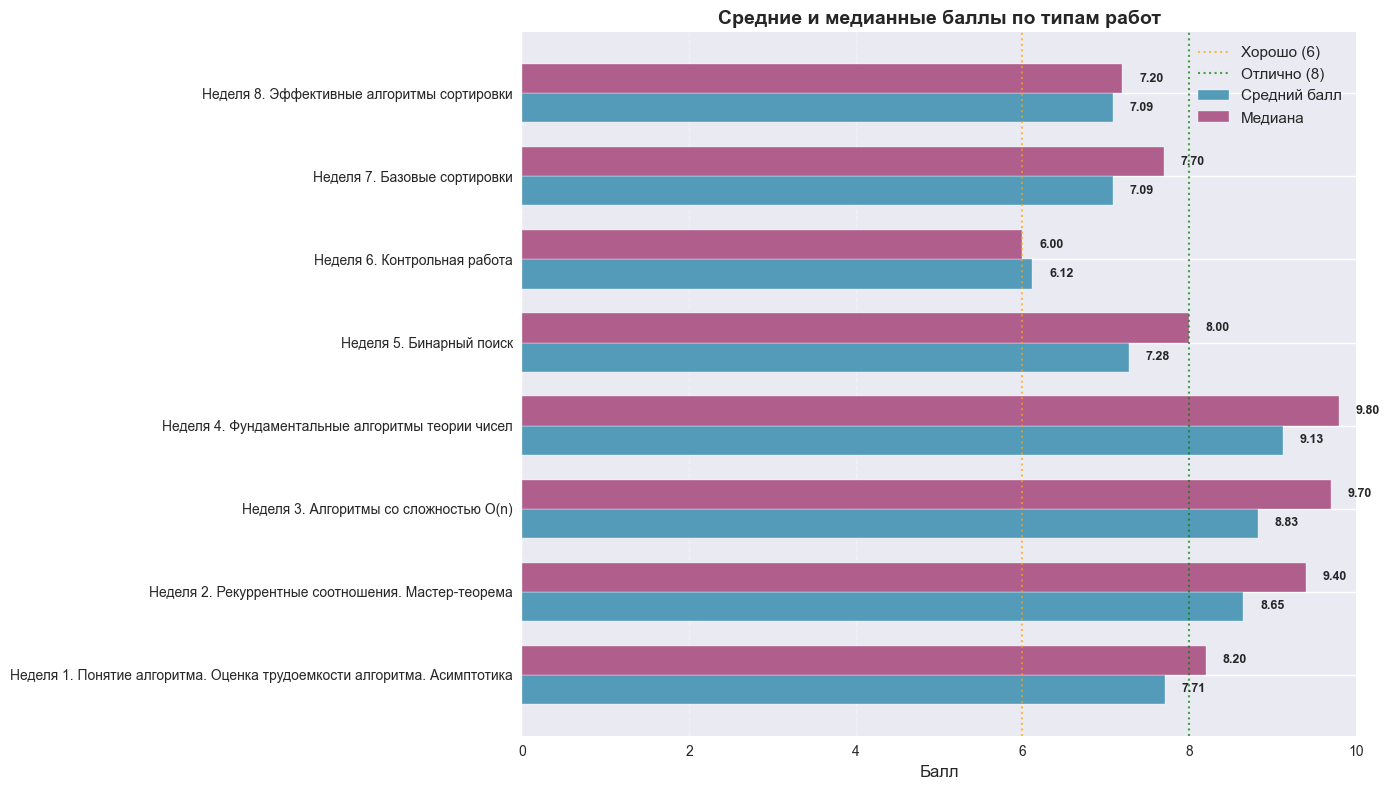

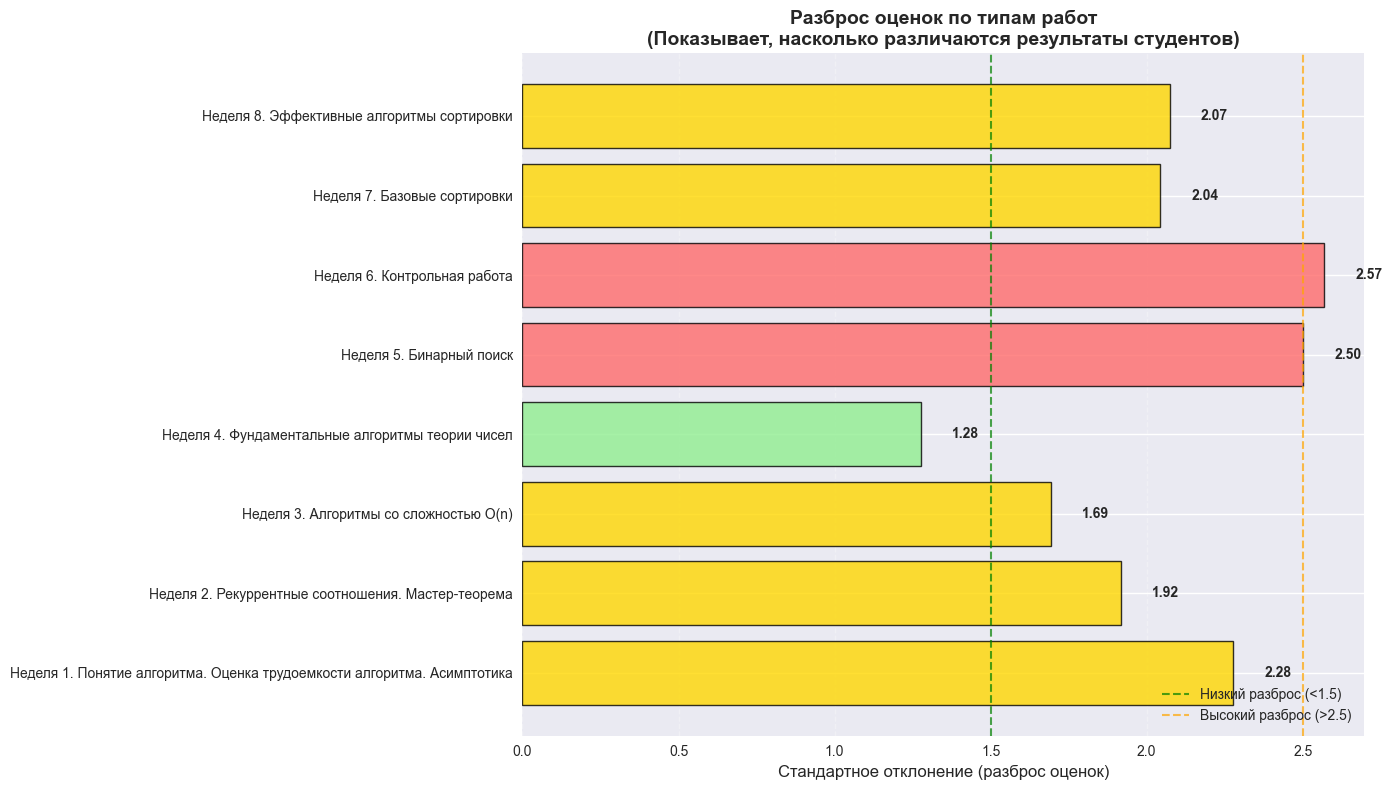

In [21]:
performance_df = analytics.get_performance_distribution()

if len(performance_df) > 0:
    print("РАСПРЕДЕЛЕНИЕ ОЦЕНОК ПО ТИПАМ ЗАДАНИЙ")
    print("=" * 80)
    pd.set_option('display.max_columns', None)
    print(performance_df.to_string(index=False))
    
    # ГРАФИК 1: Средние и медианные баллы
    fig, ax = plt.subplots(figsize=(14, max(8, len(performance_df) * 0.5)))
    
    x = np.arange(len(performance_df))
    width = 0.35
    
    bars1 = ax.barh(x - width/2, performance_df['Средний балл'], width, 
                    label='Средний балл', color='#2E86AB', alpha=0.8)
    bars2 = ax.barh(x + width/2, performance_df['Медиана'], width, 
                    label='Медиана', color='#A23B72', alpha=0.8)
    
    ax.set_yticks(x)
    ax.set_yticklabels(performance_df['Работа'], fontsize=10)
    ax.set_xlabel('Балл', fontsize=12)
    ax.set_title('Средние и медианные баллы по типам работ', fontsize=14, fontweight='bold')
    ax.set_xlim(0, 10)
    ax.legend(fontsize=11)
    ax.grid(True, alpha=0.3, axis='x', linestyle='--')
    
    for i, (bar1, bar2, mean, median) in enumerate(zip(bars1, bars2,
                                                        performance_df['Средний балл'], 
                                                        performance_df['Медиана'])):
        ax.text(mean + 0.2, i - width/2, f'{mean:.2f}', va='center', fontsize=9, fontweight='bold')
        ax.text(median + 0.2, i + width/2, f'{median:.2f}', va='center', fontsize=9, fontweight='bold')
    
    # Добавляем линию для оценки "хорошо" (6) и "отлично" (8)
    ax.axvline(6, color='orange', linestyle=':', linewidth=1.5, alpha=0.7, label='Хорошо (6)')
    ax.axvline(8, color='green', linestyle=':', linewidth=1.5, alpha=0.7, label='Отлично (8)')
    ax.legend(fontsize=11)
    
    plt.tight_layout()
    plt.show()
    

    
    # ГРАФИК 2: Разброс оценок (стандартное отклонение)
    fig, ax = plt.subplots(figsize=(14, max(8, len(performance_df) * 0.5)))
    
    # Цвета в зависимости от уровня разброса
    colors = []
    for std in performance_df['Стандартное отклонение']:
        if std < 1.5:
            colors.append('#90EE90')  # Светло-зеленый - низкий разброс
        elif std < 2.5:
            colors.append('#FFD700')  # Золотой - средний разброс
        else:
            colors.append('#FF6B6B')  # Красный - высокий разброс
    
    bars = ax.barh(performance_df['Работа'], performance_df['Стандартное отклонение'], 
                   color=colors, alpha=0.8, edgecolor='black', linewidth=1)
    
    ax.set_xlabel('Стандартное отклонение (разброс оценок)', fontsize=12)
    ax.set_title('Разброс оценок по типам работ\n(Показывает, насколько различаются результаты студентов)', 
                 fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='x', linestyle='--')

    for i, (bar, std) in enumerate(zip(bars, performance_df['Стандартное отклонение'])):
        ax.text(std + 0.1, i, f'{std:.2f}', va='center', fontsize=10, fontweight='bold')
    
    # Линии-индикаторы уровня разброса
    ax.axvline(1.5, color='green', linestyle='--', linewidth=1.5, alpha=0.7, label='Низкий разброс (<1.5)')
    ax.axvline(2.5, color='orange', linestyle='--', linewidth=1.5, alpha=0.7, label='Высокий разброс (>2.5)')
    ax.legend(fontsize=10, loc='lower right')
    
    plt.tight_layout()
    plt.show()

else:
    print("Недостаточно данных для анализа распределения")


### Прогресс студентов


СВОДНАЯ СТАТИСТИКА ПО ПРОГРЕССУ
Улучшилось: 114
Ухудшилось: 86
Стабильно: 12
Средний прогресс: 0.73
Медиана прогресса: 0.50

РАСПРЕДЕЛЕНИЕ ТРЕНДОВ:
  улучшение: 114 студентов (51.4%)
  ухудшение: 86 студентов (38.7%)
  стабильно: 12 студентов (5.4%)
  недостаточно данных: 10 студентов (4.5%)


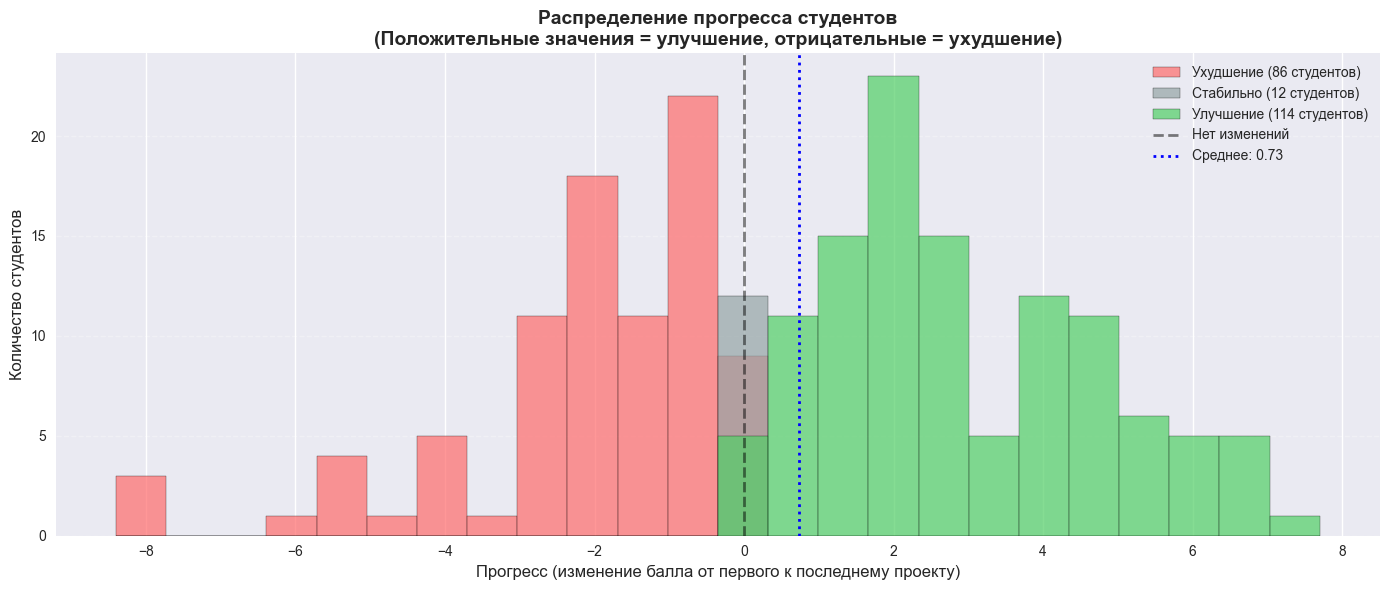

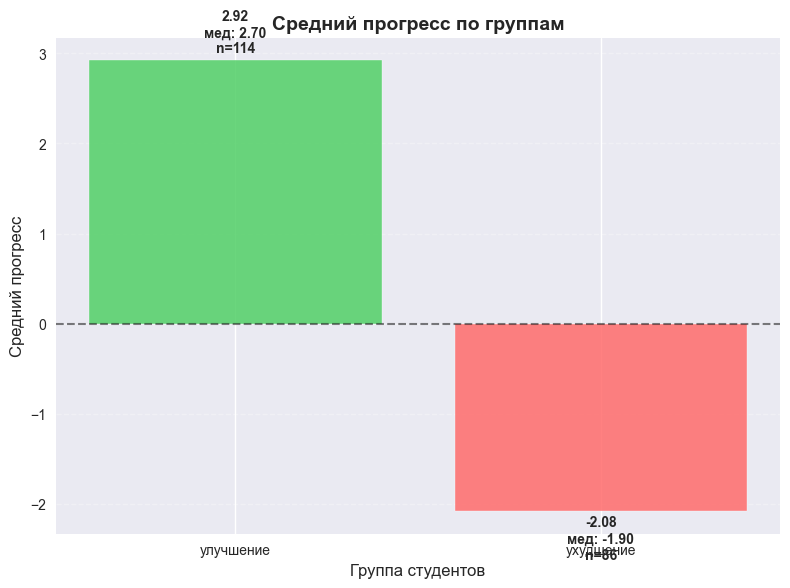

In [22]:
progress_df = analytics.get_student_progress()
progress_summary = analytics.get_progress_summary()

if len(progress_df) > 0 and 'Прогресс' in progress_df.columns:
    print("СВОДНАЯ СТАТИСТИКА ПО ПРОГРЕССУ")
    print("=" * 60)
    for key, value in progress_summary.items():
        if isinstance(value, (int, float)):
            if 'прогресс' in key.lower():
                print(f"{key}: {value:.2f}")
            else:
                print(f"{key}: {value}")
        else:
            print(f"{key}: {value}")

    if 'Тренд' in progress_df.columns:
        trend_counts = progress_df['Тренд'].value_counts()
        print("\nРАСПРЕДЕЛЕНИЕ ТРЕНДОВ:")
        total_with_trend = trend_counts.sum()
        for trend, count in trend_counts.items():
            pct = count / total_with_trend * 100 if total_with_trend > 0 else 0
            print(f"  {trend}: {count} студентов ({pct:.1f}%)")
    
    progress_values = progress_df['Прогресс'].dropna()
    
    if len(progress_values) > 0:
        # ГРАФИК 1: Распределение прогресса с категориями
        fig, ax = plt.subplots(figsize=(14, 6))
        
        # Разделяем на категории
        improving = progress_values[progress_values > 0]
        declining = progress_values[progress_values < 0]
        stable = progress_values[progress_values == 0]
        
        # Создаем гистограмму с разными цветами
        bins = np.linspace(progress_values.min(), progress_values.max(), 25)
        
        if len(declining) > 0:
            ax.hist(declining, bins=bins, alpha=0.7, color='#FF6B6B', 
                   label=f'Ухудшение ({len(declining)} студентов)', edgecolor='black')
        if len(stable) > 0:
            ax.hist(stable, bins=bins, alpha=0.7, color='#95A5A6', 
                   label=f'Стабильно ({len(stable)} студентов)', edgecolor='black')
        if len(improving) > 0:
            ax.hist(improving, bins=bins, alpha=0.7, color='#51CF66', 
                   label=f'Улучшение ({len(improving)} студентов)', edgecolor='black')
        
        ax.axvline(0, color='black', linestyle='--', linewidth=2, alpha=0.5, label='Нет изменений')
        ax.axvline(progress_values.mean(), color='blue', linestyle=':', linewidth=2, 
                  label=f'Среднее: {progress_values.mean():.2f}')
        
        ax.set_xlabel('Прогресс (изменение балла от первого к последнему проекту)', fontsize=12)
        ax.set_ylabel('Количество студентов', fontsize=12)
        ax.set_title('Распределение прогресса студентов\n(Положительные значения = улучшение, отрицательные = ухудшение)', 
                     fontsize=14, fontweight='bold')
        ax.legend(fontsize=10, loc='upper right')
        ax.grid(True, alpha=0.3, axis='y', linestyle='--')
        
        plt.tight_layout()
        plt.show()
        
        # ГРАФИК 2: Средний прогресс по группам (без стабильных)
        if 'Тренд' in progress_df.columns:
            progress_with_trend = progress_df[['Прогресс', 'Тренд']].dropna()
            if len(progress_with_trend) > 0:
                trend_order = ['улучшение', 'ухудшение']
                trend_stats = (
                    progress_with_trend[progress_with_trend['Тренд'].isin(trend_order)]
                    .groupby('Тренд')['Прогресс']
                    .agg(['mean', 'median', 'count'])
                    .reindex(trend_order)
                ).dropna(subset=['count'])

                if len(trend_stats) > 0:
                    fig, ax = plt.subplots(figsize=(8, 6))
                    color_map = {'улучшение': '#51CF66', 'ухудшение': '#FF6B6B'}
                    colors = [color_map.get(trend, '#95A5A6') for trend in trend_stats.index]

                    bars = ax.bar(trend_stats.index, trend_stats['mean'], color=colors, alpha=0.85)
                    ax.axhline(0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)

                    for bar, mean, median, count in zip(bars, trend_stats['mean'], trend_stats['median'], trend_stats['count']):
                        y_pos = mean + 0.05 if mean >= 0 else mean - 0.05
                        va = 'bottom' if mean >= 0 else 'top'
                        ax.text(
                            bar.get_x() + bar.get_width() / 2,
                            y_pos,
                            f"{mean:.2f}\nмед: {median:.2f}\nn={int(count)}",
                            ha='center', va=va,
                            fontsize=10, fontweight='bold'
                        )

                    ax.set_ylabel('Средний прогресс', fontsize=12)
                    ax.set_xlabel('Группа студентов', fontsize=12)
                    ax.set_title('Средний прогресс по группам', fontsize=14, fontweight='bold')
                    ax.grid(True, alpha=0.3, axis='y', linestyle='--')

                    plt.tight_layout()
                    plt.show()
        
        # ГРАФИК 3: Средние траектории по проектам
        exclude_cols = ['Прогресс', 'Тренд', 'Студент']
        project_cols = [col for col in progress_df.columns
                        if 'Проект' in col and col not in exclude_cols]

        def get_proj_num(name):
            import re
            match = re.search(r'(\d+)', name)
            return int(match.group(1)) if match else 999

        project_cols = sorted(project_cols, key=get_proj_num)

        if len(project_cols) >= 2 and 'Тренд' in progress_df.columns:
            fig, ax = plt.subplots(figsize=(14, 7))
            trend_order = ['улучшение', 'стабильно', 'ухудшение']
            color_map = {'улучшение': '#51CF66', 'стабильно': '#95A5A6', 'ухудшение': '#FF6B6B'}
            plotted = 0

            for trend_type in trend_order:
                trend_students = progress_df[progress_df['Тренд'] == trend_type]
                if len(trend_students) == 0:
                    continue

                mean_scores = []
                for proj_col in project_cols:
                    scores = trend_students[proj_col].dropna()
                    scores = scores[scores > 0]
                    mean_scores.append(scores.mean() if len(scores) > 0 else np.nan)

                valid_points = [(i, s) for i, s in enumerate(mean_scores) if not pd.isna(s)]
                if len(valid_points) < 2:
                    continue

                x_vals = [v[0] for v in valid_points]
                y_vals = [v[1] for v in valid_points]
                ax.plot(
                    x_vals,
                    y_vals,
                    marker='o',
                    linewidth=2.5,
                    markersize=8,
                    color=color_map.get(trend_type, '#95A5A6'),
                    label=f"{trend_type.capitalize()} (n={len(trend_students)})"
                )
                plotted += 1

            overall_mean = []
            for proj_col in project_cols:
                scores = progress_df[proj_col].dropna()
                scores = scores[scores > 0]
                overall_mean.append(scores.mean() if len(scores) > 0 else np.nan)

            valid_overall = [(i, s) for i, s in enumerate(overall_mean) if not pd.isna(s)]
            overall_plotted = False
            if len(valid_overall) >= 2:
                x_vals = [v[0] for v in valid_overall]
                y_vals = [v[1] for v in valid_overall]
                ax.plot(
                    x_vals,
                    y_vals,
                    marker='s',
                    linewidth=3,
                    markersize=10,
                    color='#2E86AB',
                    linestyle='--',
                    label='Средняя траектория по курсу',
                    zorder=5
                )
                overall_plotted = True

            if plotted == 0 and not overall_plotted:
                plt.close(fig)
            else:
                ax.set_xticks(range(len(project_cols)))
                ax.set_xticklabels(
                    [col[:20] + '...' if len(col) > 20 else col for col in project_cols],
                    rotation=45,
                    ha='right',
                    fontsize=9
                )
                ax.set_ylabel('Средний балл', fontsize=12)
                ax.set_xlabel('Проект', fontsize=12)
                ax.set_title('Средние траектории по проектам для разных трендов', fontsize=14, fontweight='bold')
                ax.set_ylim(0, 10)
                ax.grid(True, alpha=0.3, linestyle='--')
                ax.legend(fontsize=10, loc='best')

                plt.tight_layout()
                plt.show()
else:
    print("Недостаточно данных для анализа прогресса")


## МЕТРИКА 3: Качество обучения

### Корреляция между типами работ


КОРРЕЛЯЦИОННАЯ МАТРИЦА МЕЖДУ АКТИВНОСТЯМИ РЕПЕРНЫХ ТОЧЕК

Матрица показывает, насколько связаны результаты студентов по основным активностям курса.
Значения от -1 до 1, где:
  • 1.0 = идеальная положительная связь (100% совпадение)
  • 0.0 = отсутствие связи
  • -1.0 = идеальная отрицательная связь (обратная зависимость)

                               Неделя 6. Контрольная работа  \
Неделя 6. Контрольная работа                            1.0   
Неделя 10. Контрольная работа                           NaN   

                               Неделя 10. Контрольная работа  
Неделя 6. Контрольная работа                             NaN  
Неделя 10. Контрольная работа                            NaN  

КАК ЧИТАТЬ МАТРИЦУ/ГРАФИК:
   • Диагональ всегда 1.00 — это сравнение активности с самой собой.
   • Чем ближе значение к +1, тем сильнее перенос навыков между активностями.
   • Значения около 0 показывают независимые компетенции.
   • Отрицательные значения (синие ячейки) — сигнал диссонанса: 

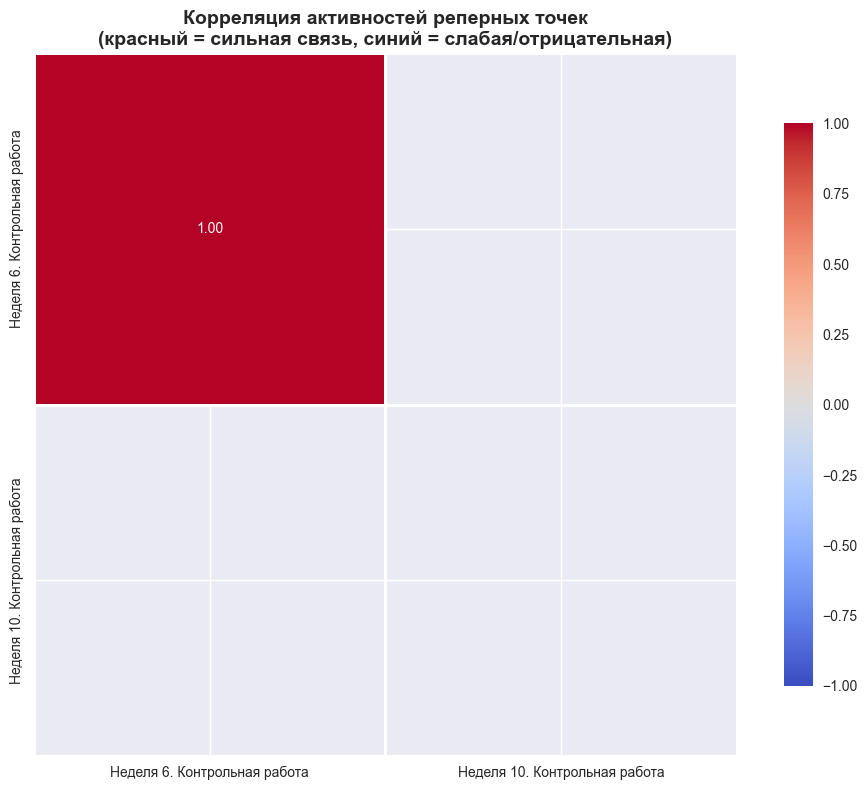

In [23]:
corr_matrix = analytics.get_correlations()

if len(corr_matrix) > 0:
    print("КОРРЕЛЯЦИОННАЯ МАТРИЦА МЕЖДУ АКТИВНОСТЯМИ РЕПЕРНЫХ ТОЧЕК")
    print("=" * 60)
    print("\nМатрица показывает, насколько связаны результаты студентов по основным активностям курса.")
    print("Значения от -1 до 1, где:")
    print("  • 1.0 = идеальная положительная связь (100% совпадение)")
    print("  • 0.0 = отсутствие связи")
    print("  • -1.0 = идеальная отрицательная связь (обратная зависимость)")
    print("\n" + "=" * 60)
    print(corr_matrix.round(3))
    
    print("\nКАК ЧИТАТЬ МАТРИЦУ/ГРАФИК:")
    print("   • Диагональ всегда 1.00 — это сравнение активности с самой собой.")
    print("   • Чем ближе значение к +1, тем сильнее перенос навыков между активностями.")
    print("   • Значения около 0 показывают независимые компетенции.")
    print("   • Отрицательные значения (синие ячейки) — сигнал диссонанса: успех в одной активности сопровождается провалом в другой.")
    
    engagement_types = getattr(analytics, 'engagement_activity_types', [])
    work_types = {
        work_name: analytics.work_data.get(work_name, {}).get('work_type')
        for work_name in corr_matrix.columns
    }
    type_labels = {
        t: analytics.activity_classifier.get(t, {}).get('label', t.capitalize())
        for t in set(work_types.values()) if t
    }

    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
                vmin=-1, vmax=1, ax=ax)
    ax.set_title('Корреляция активностей реперных точек\n(красный = сильная связь, синий = слабая/отрицательная)',
                 fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    from itertools import combinations
    work_names = corr_matrix.index.tolist()
    strong_correlations = []
    weak_correlations = []
    type_pairs = {}

    for w1, w2 in combinations(work_names, 2):
        corr_value = corr_matrix.loc[w1, w2]
        if pd.isna(corr_value):
            continue
        if abs(corr_value) >= 0.6:
            strong_correlations.append((w1, w2, corr_value))
        elif abs(corr_value) < 0.3:
            weak_correlations.append((w1, w2, corr_value))

        t1 = work_types.get(w1) or 'other'
        t2 = work_types.get(w2) or 'other'
        key = tuple(sorted((t1, t2)))
        type_pairs.setdefault(key, []).append(corr_value)
else:
    print("Недостаточно данных для анализа корреляций (нужно минимум 2 активности реперных точек)")


### Корреляции всех заданий с ключевыми активностями (реперными точками)


СВЯЗЬ ОСНОВНЫХ И БОНУСНЫХ АКТИВНОСТЕЙ С АКТИВНОСТЯМИ РЕПЕРНЫХ ТОЧЕК
Строки — основные и бонусные активности. Столбцы — активности реперных точек.
                                                    Неделя 6. Контрольная работа  \
Неделя 1. Понятие алгоритма. Оценка трудоемкост...                         0.204   
Неделя 2. Рекуррентные соотношения. Мастер-теорема                         0.253   
Неделя 3. Алгоритмы со сложностью O(n)                                     0.342   
Неделя 4. Фундаментальные алгоритмы теории чисел                           0.241   
Неделя 5. Бинарный поиск                                                   0.353   
Неделя 7. Базовые сортировки                                               0.246   
Неделя 8. Эффективные алгоритмы сортировки                                 0.041   
Неделя 9. Префиксные суммы. Метод двух указателей                            NaN   

                                                    Неделя 10. Контрольная работа  
Неделя 1. Пон

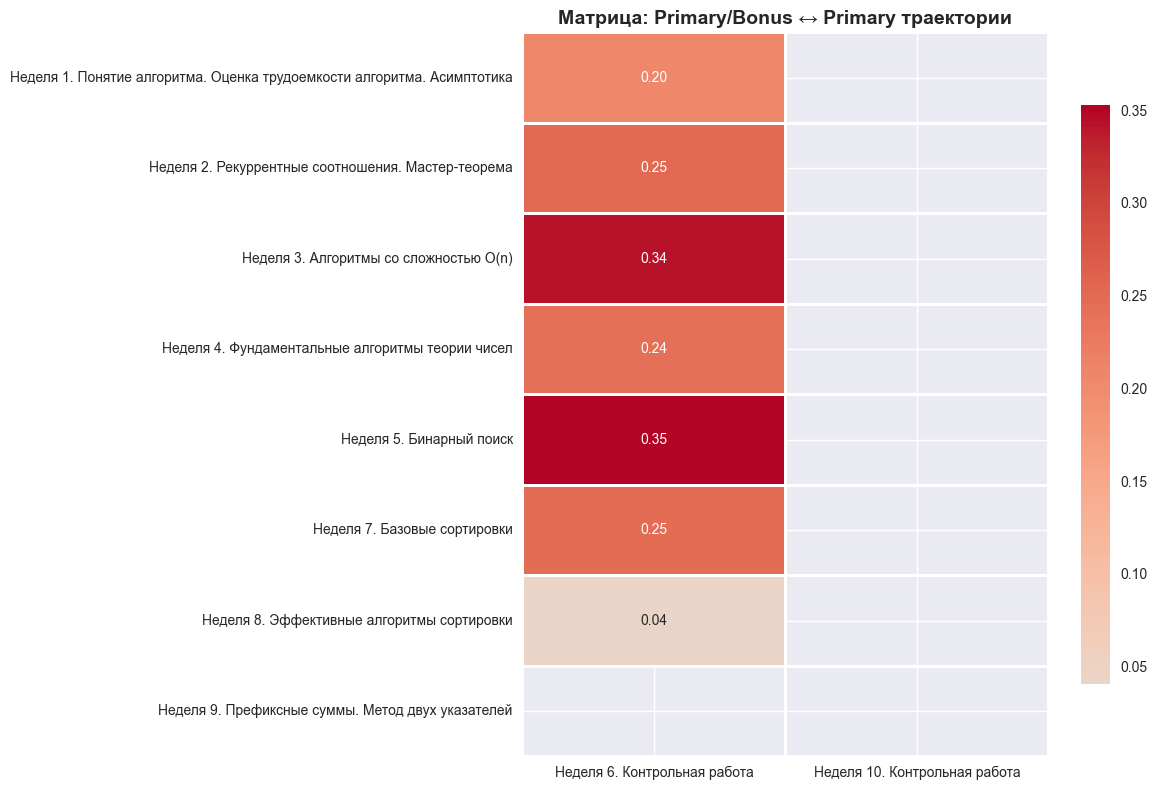

ОСНОВНЫЕ АКТИВНОСТИ


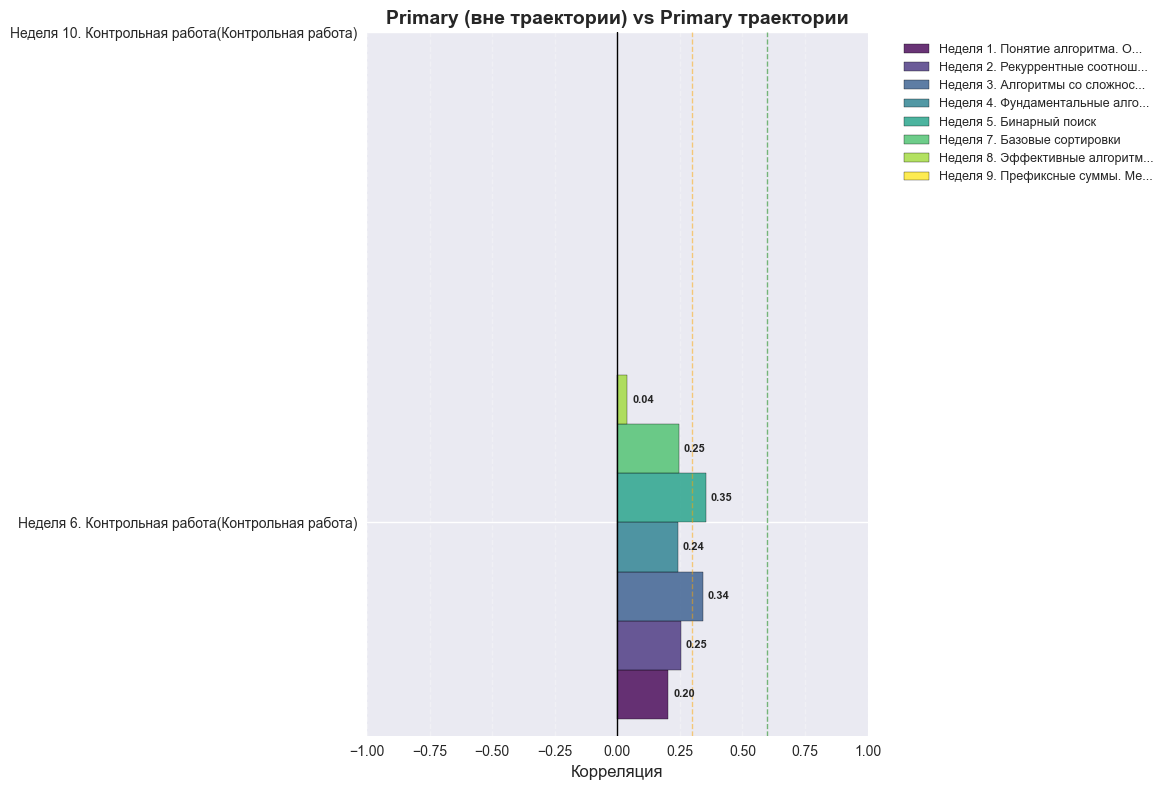

In [25]:
correlations_with_engagement = analytics.get_correlations_with_projects()

if len(correlations_with_engagement) > 0:
    source_types = {
        name: analytics.work_data.get(name, {}).get('work_type')
        for name in correlations_with_engagement.index
    }
    engagement_types = {
        name: analytics.work_data.get(name, {}).get('work_type')
        for name in correlations_with_engagement.columns
    }
    engagement_labels = {
        name: analytics.activity_classifier.get(engagement_types.get(name, ''), {}).get('label', name)
        for name in correlations_with_engagement.columns
    }

    primary_outside = [name for name, t in source_types.items() if t in set(analytics.primary_activity_types or [])]
    bonus_activities = [name for name, t in source_types.items() if t in (analytics.bonus_types or {'bonus'})]

    print("=" * 80)
    print("СВЯЗЬ ОСНОВНЫХ И БОНУСНЫХ АКТИВНОСТЕЙ С АКТИВНОСТЯМИ РЕПЕРНЫХ ТОЧЕК")
    print("=" * 80)
    print("Строки — основные и бонусные активности. Столбцы — активности реперных точек.")

    display_df = correlations_with_engagement.round(3)
    print(display_df)

    print("   КАК ЧИТАТЬ МАТРИЦУ:")
    print("   • Строки: подготовительные primary и bonus-активности.")
    print("   • Столбцы: primary-активности траектории вовлеченности.")
    print("   • ≥0.4 — заметная связь, 0–0.4 — слабый эффект, <0 — возможный конфликт.")

    fig, ax = plt.subplots(figsize=(max(12, len(correlations_with_engagement.columns) * 1.6), 8))
    sns.heatmap(
        correlations_with_engagement,
        annot=True,
        fmt='.2f',
        cmap='coolwarm',
        center=0,
        linewidths=1,
        cbar_kws={'shrink': 0.8},
        ax=ax
    )
    ax.set_title('Матрица: Primary/Bonus ↔ Primary траектории', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    if bonus_activities:
        print("    " + "=" * 80)
        print("БОНУСНЫЕ АКТИВНОСТИ")
        print("=" * 80)
        bonus_corrs = correlations_with_engagement.loc[bonus_activities]
        fig, ax = plt.subplots(figsize=(max(12, len(bonus_corrs.columns) * 2.5), max(8, len(bonus_activities) * 0.6)))
        x_pos = np.arange(len(bonus_corrs.columns))
        width = 0.8 / len(bonus_activities)
        colors_bonus = plt.cm.Set3(np.linspace(0, 1, len(bonus_activities)))
        for i, (bonus_work, row) in enumerate(bonus_corrs.iterrows()):
            short_name = bonus_work[:30] + '...' if len(bonus_work) > 30 else bonus_work
            offset = (i - len(bonus_activities) / 2 + 0.5) * width
            ax.barh(x_pos + offset, row.values, width, label=short_name, color=colors_bonus[i], alpha=0.8, edgecolor='black')
            for j, val in enumerate(row.values):
                if not pd.isna(val):
                    ax.text(val + 0.02 if val >= 0 else val - 0.02, j + offset, f"{val:.2f}", va='center', fontsize=8, fontweight='bold', ha='left' if val >= 0 else 'right')
        column_labels = [f"{col}({engagement_labels.get(col, col)})" for col in bonus_corrs.columns]
        ax.set_yticks(x_pos)
        ax.set_yticklabels(column_labels, fontsize=10)
        ax.set_xlabel('Корреляция', fontsize=12)
        ax.set_title('Bonus vs Primary траектории', fontsize=14, fontweight='bold')
        ax.axvline(0, color='black', linestyle='-', linewidth=1)
        ax.axvline(0.3, color='orange', linestyle='--', linewidth=1, alpha=0.5)
        ax.axvline(0.6, color='green', linestyle='--', linewidth=1, alpha=0.5)
        ax.set_xlim(-1, 1)
        ax.grid(True, alpha=0.3, axis='x', linestyle='--')
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
        plt.tight_layout()
        plt.show()

    if primary_outside:
        print("=" * 80)
        print("ОСНОВНЫЕ АКТИВНОСТИ")
        print("=" * 80)
        primary_corrs = correlations_with_engagement.loc[primary_outside]
        fig, ax = plt.subplots(figsize=(max(12, len(primary_corrs.columns) * 2.5), max(8, len(primary_outside) * 0.6)))
        x_pos = np.arange(len(primary_corrs.columns))
        width = 0.8 / len(primary_outside)
        colors_primary = plt.cm.viridis(np.linspace(0, 1, len(primary_outside)))
        for i, (primary_work, row) in enumerate(primary_corrs.iterrows()):
            short_name = primary_work[:30] + '...' if len(primary_work) > 30 else primary_work
            offset = (i - len(primary_outside) / 2 + 0.5) * width
            ax.barh(x_pos + offset, row.values, width, label=short_name, color=colors_primary[i], alpha=0.8, edgecolor='black')
            for j, val in enumerate(row.values):
                if not pd.isna(val):
                    ax.text(val + 0.02 if val >= 0 else val - 0.02, j + offset, f"{val:.2f}", va='center', fontsize=8, fontweight='bold', ha='left' if val >= 0 else 'right')
        column_labels = [f"{col}({engagement_labels.get(col, col)})" for col in primary_corrs.columns]
        ax.set_yticks(x_pos)
        ax.set_yticklabels(column_labels, fontsize=10)
        ax.set_xlabel('Корреляция', fontsize=12)
        ax.set_title('Primary (вне траектории) vs Primary траектории', fontsize=14, fontweight='bold')
        ax.axvline(0, color='black', linestyle='-', linewidth=1)
        ax.axvline(0.3, color='orange', linestyle='--', linewidth=1, alpha=0.5)
        ax.axvline(0.6, color='green', linestyle='--', linewidth=1, alpha=0.5)
        ax.set_xlim(-1, 1)
        ax.grid(True, alpha=0.3, axis='x', linestyle='--')
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
        plt.tight_layout()
        plt.show()
else:
    print("Недостаточно данных для анализа корреляций")

### Консистентность результатов


КОНСИСТЕНТНОСТЬ РЕЗУЛЬТАТОВ СТУДЕНТОВ
РАСПРЕДЕЛЕНИЕ ПО КАТЕГОРИЯМ:
--------------------------------------------------------------------------------
  • умеренно стабильный: 112 студентов (50.5%)
  • нестабильный: 58 студентов (26.1%)
  • стабильно успешный: 40 студентов (18.0%)
  • нет активностей: 5 студентов (2.3%)
  • единичная активность: 5 студентов (2.3%)
  • стабильно неуспешный: 2 студентов (0.9%)

СТАТИСТИКА ПО КОЭФФИЦИЕНТУ ВАРИАЦИИ:
--------------------------------------------------------------------------------
  • Средний CV: 0.236
  • Медиана CV: 0.204
  • Минимальный CV: 0.000 (самый стабильный студент)
  • Максимальный CV: 0.776 (самый нестабильный студент)

  Распределение по уровням стабильности:
    ✅ Очень стабильные (CV < 0.1): 40 студентов
    ⚠️ Умеренно стабильные (CV 0.1-0.3): 114 студентов
    ❌ Нестабильные (CV > 0.3): 58 студентов


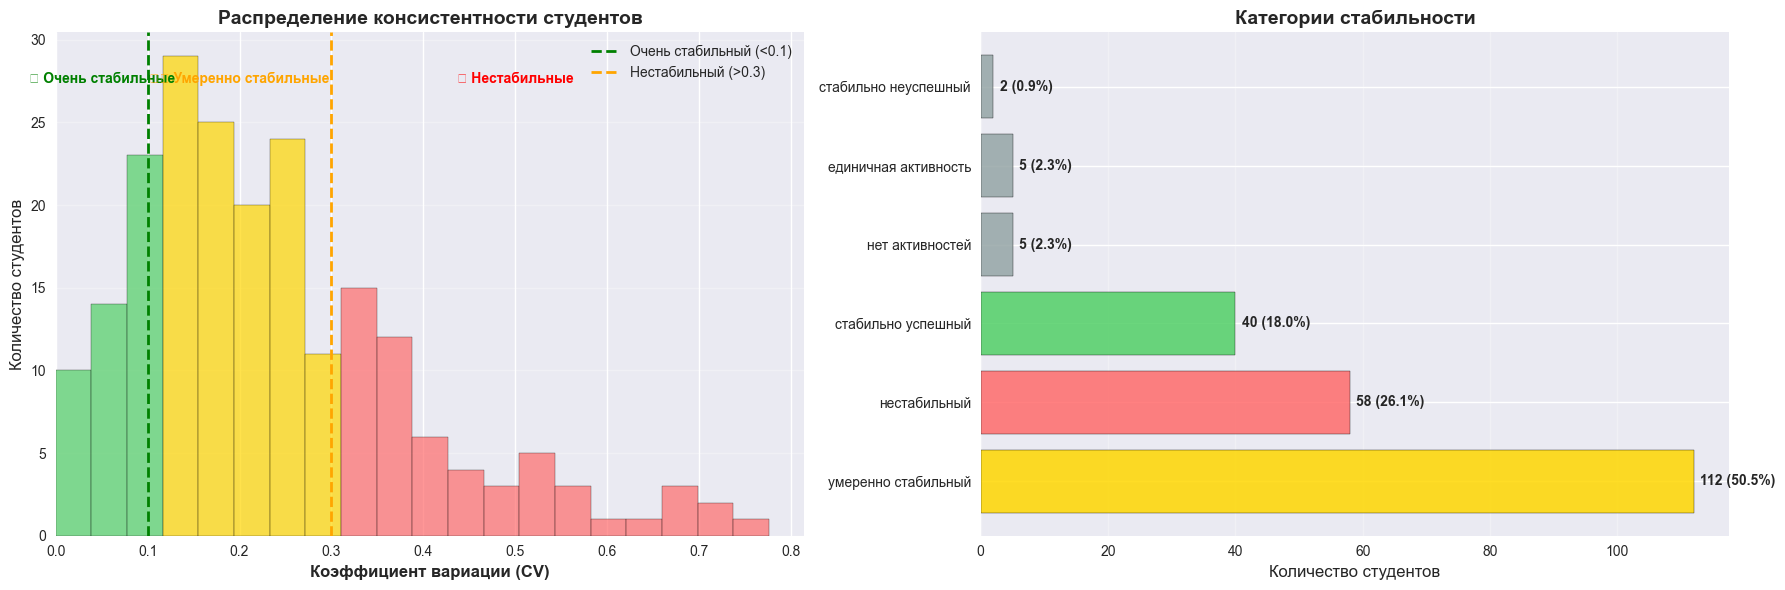

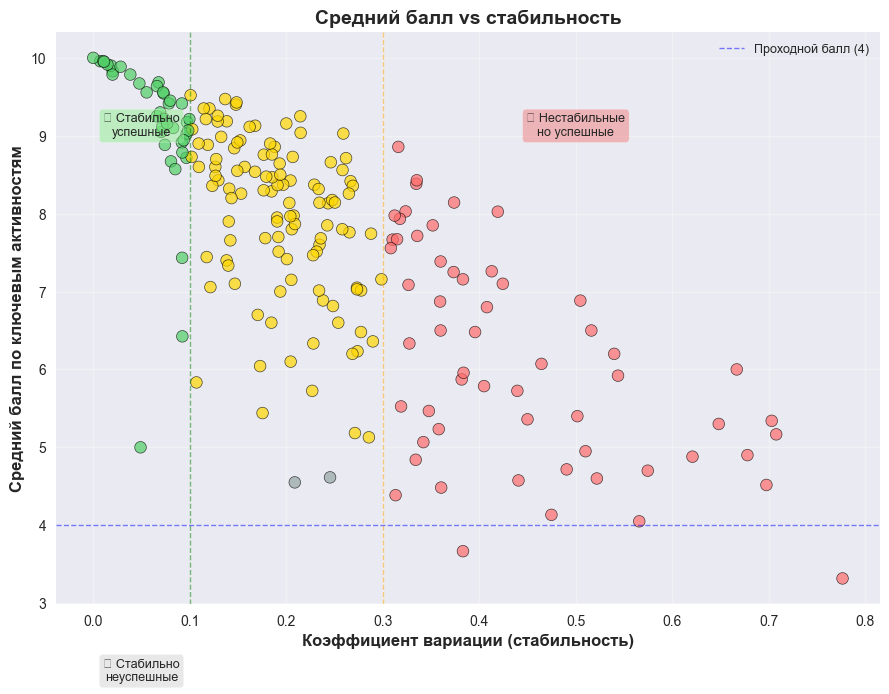


Средние показатели по категориям:
                      Средний балл (ср.)  CV (ср.)
Категория                                         
единичная активность               5.100       NaN
нестабильный                       6.137     0.439
нет активностей                      NaN       NaN
стабильно неуспешный               4.582     0.227
стабильно успешный                 9.148     0.064
умеренно стабильный                7.985     0.192

ДЕТАЛЬНАЯ ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ

УМЕРЕННО СТАБИЛЬНЫЙ (112 студентов, 50.5%):
   • Средний балл по группе: 7.99
   • Средний коэффициент вариации: 0.192

   СТУДЕНТЫ В ЭТОЙ ГРУППЕ (112 человек):
   ----------------------------------------------------------------------------
    1. Баранцев Михаил Алексеевич   2. Поляков Даниил Павлович     3. Шайхразиев Камиль Айратович  
    4. Забаров Амир Римович        5. Швайбович Роман Владиславович   6. Колдунов Григорий Сергеевич  
    7. Свечников Андрей Дмитриевич   8. Костырин Николай Сергеевич   9. Бор

In [27]:
consistency_df = analytics.get_consistency()

if len(consistency_df) > 0:
    print("=" * 80)
    print("КОНСИСТЕНТНОСТЬ РЕЗУЛЬТАТОВ СТУДЕНТОВ")
    print("=" * 80)
    
    # Распределение по категориям
    category_colors = {
        'стабильно успешный': '#51CF66',
        'умеренно стабильный': '#FFD700',
        'нестабильный': '#FF6B6B',
        'стабильно неуспешный': '#95A5A6',
        'единичная сдача': '#BDC3C7',
        'нет сдач по проектам': '#6C757D'
    }
    if 'Категория' in consistency_df.columns:
        category_counts = consistency_df['Категория'].value_counts()
        print("РАСПРЕДЕЛЕНИЕ ПО КАТЕГОРИЯМ:")
        print("-" * 80)
        for category, count in category_counts.items():
            percentage = count / len(consistency_df) * 100
            print(f"  • {category}: {count} студентов ({percentage:.1f}%)")
    
    # Статистика по коэффициенту вариации
    cv_values = consistency_df['Коэффициент вариации'].dropna()
    if len(cv_values) > 0:
        print(f"\nСТАТИСТИКА ПО КОЭФФИЦИЕНТУ ВАРИАЦИИ:")
        print("-" * 80)
        print(f"  • Средний CV: {cv_values.mean():.3f}")
        print(f"  • Медиана CV: {cv_values.median():.3f}")
        print(f"  • Минимальный CV: {cv_values.min():.3f} (самый стабильный студент)")
        print(f"  • Максимальный CV: {cv_values.max():.3f} (самый нестабильный студент)")
        
        # Подсчет по зонам
        very_stable = (cv_values < 0.1).sum()
        moderate = ((cv_values >= 0.1) & (cv_values <= 0.3)).sum()
        unstable = (cv_values > 0.3).sum()
        
        print(f"\n  Распределение по уровням стабильности:")
        print(f"    ✅ Очень стабильные (CV < 0.1): {very_stable} студентов")
        print(f"    ⚠️ Умеренно стабильные (CV 0.1-0.3): {moderate} студентов")
        print(f"    ❌ Нестабильные (CV > 0.3): {unstable} студентов")
    
    # ВИЗУАЛИЗАЦИЯ: распределение консистентности и категорий
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    
    # Гистограмма коэффициента вариации
    ax_hist = axes[0]
    if len(cv_values) > 0:
        n, bins, patches = ax_hist.hist(cv_values, bins=20, edgecolor='black', alpha=0.7)
        ax_hist.axvline(0.1, color='green', linestyle='--', linewidth=2, label='Очень стабильный (<0.1)')
        ax_hist.axvline(0.3, color='orange', linestyle='--', linewidth=2, label='Нестабильный (>0.3)')
        for patch, bin_left in zip(patches, bins[:-1]):
            if bin_left < 0.1:
                patch.set_facecolor('#51CF66')
            elif bin_left < 0.3:
                patch.set_facecolor('#FFD700')
            else:
                patch.set_facecolor('#FF6B6B')
        ax_hist.set_xlabel('Коэффициент вариации (CV)', fontsize=12, fontweight='bold')
        ax_hist.set_ylabel('Количество студентов', fontsize=12)
        ax_hist.set_title('Распределение консистентности студентов', fontsize=14, fontweight='bold')
        ax_hist.grid(True, alpha=0.3, axis='y')
        ax_hist.set_xlim(left=0)
        ymax = ax_hist.get_ylim()[1]
        ax_hist.text(0.05, ymax * 0.9, '✅ Очень стабильные', fontsize=10, color='green', fontweight='bold', ha='center')
        ax_hist.text(0.2, ymax * 0.9, '⚠️ Умеренно стабильные', fontsize=10, color='orange', fontweight='bold', ha='center')
        ax_hist.text(0.5, ymax * 0.9, '❌ Нестабильные', fontsize=10, color='red', fontweight='bold', ha='center')
        ax_hist.legend(fontsize=10)
    else:
        ax_hist.text(0.5, 0.5, 'Недостаточно данных', ha='center', va='center', fontsize=12)
        ax_hist.set_axis_off()
    
    # Распределение по категориям
    ax_cat = axes[1]
    if 'Категория' in consistency_df.columns and 'category_counts' in locals():
        colors_list = [category_colors.get(cat, '#95A5A6') for cat in category_counts.index]
        bars = ax_cat.barh(category_counts.index, category_counts.values, color=colors_list, alpha=0.85, edgecolor='black')
        for i, (bar, val) in enumerate(zip(bars, category_counts.values)):
            percentage = val / len(consistency_df) * 100
            ax_cat.text(val + 1, i, f'{val} ({percentage:.1f}%)', va='center', fontsize=10, fontweight='bold')
        ax_cat.set_xlabel('Количество студентов', fontsize=12)
        ax_cat.set_title('Категории стабильности', fontsize=14, fontweight='bold')
        ax_cat.grid(True, alpha=0.3, axis='x')
    else:
        ax_cat.text(0.5, 0.5, 'Категории не определены', ha='center', va='center', fontsize=12)
        ax_cat.set_axis_off()
    
    plt.tight_layout()
    plt.show()
    
    # Визуализация: связь среднего балла и стабильности
    if 'Средний балл' in consistency_df.columns and len(cv_values) > 0:
        mean_scores = consistency_df['Средний балл'].dropna()
        cv_for_mean = consistency_df.loc[mean_scores.index, 'Коэффициент вариации']
        
        fig, ax = plt.subplots(figsize=(9, 7))
        scatter_colors = []
        for idx in mean_scores.index:
            if 'Категория' in consistency_df.columns:
                cat = consistency_df.loc[idx, 'Категория']
                scatter_colors.append(category_colors.get(cat, '#95A5A6'))
            else:
                scatter_colors.append('#95A5A6')
        
        ax.scatter(cv_for_mean, mean_scores, c=scatter_colors, alpha=0.7, s=70, edgecolors='black', linewidth=0.5)
        ax.axvline(0.1, color='green', linestyle='--', linewidth=1, alpha=0.5)
        ax.axvline(0.3, color='orange', linestyle='--', linewidth=1, alpha=0.5)
        ax.axhline(4, color='blue', linestyle='--', linewidth=1, alpha=0.5, label='Проходной балл (4)')
        ax.set_xlabel('Коэффициент вариации (стабильность)', fontsize=12, fontweight='bold')
        ax.set_ylabel('Средний балл по ключевым активностям', fontsize=12, fontweight='bold')
        ax.set_title('Средний балл vs стабильность', fontsize=14, fontweight='bold')
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=9)
        
        ax.text(0.05, 9, '✅ Стабильно\nуспешные', fontsize=9, ha='center',
                bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))
        ax.text(0.5, 9, '❌ Нестабильные\nно успешные', fontsize=9, ha='center',
                bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.5))
        ax.text(0.05, 2, '📊 Стабильно\nнеуспешные', fontsize=9, ha='center',
                bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.5))
        
        plt.tight_layout()
        plt.show()
        
        if 'Категория' in consistency_df.columns:
            summary_cols = [col for col in ['Средний балл', 'Коэффициент вариации'] if col in consistency_df.columns]
            if summary_cols:
                category_summary = (
                    consistency_df.groupby('Категория')[summary_cols]
                    .mean()
                    .rename(columns={'Средний балл': 'Средний балл (ср.)',
                                     'Коэффициент вариации': 'CV (ср.)'})
                    .round(3)
                )
                print("\nСредние показатели по категориям:")
                print(category_summary.to_string())
    
    # ДЕТАЛЬНАЯ ИНТЕРПРЕТАЦИЯ
    print("\n" + "=" * 80)
    print("ДЕТАЛЬНАЯ ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ")
    print("=" * 80)
    
    if 'Категория' in consistency_df.columns:
        # Анализ каждой категории
        for category in category_counts.index:
            cat_data = consistency_df[consistency_df['Категория'] == category]
            count = len(cat_data)
            percentage = count / len(consistency_df) * 100
            
            print(f"\n{category.upper()} ({count} студентов, {percentage:.1f}%):")
            
            if 'Средний балл' in cat_data.columns:
                avg_mean = cat_data['Средний балл'].mean()
                print(f"   • Средний балл по группе: {avg_mean:.2f}")
            
            if 'Коэффициент вариации' in cat_data.columns:
                avg_cv = cat_data['Коэффициент вариации'].mean()
                print(f"   • Средний коэффициент вариации: {avg_cv:.3f}")
            
            # Выводим список студентов в этой категории
            if 'ФИО' in cat_data.columns:
                # Сортируем по среднему баллу (если есть) или по ФИО
                if 'Средний балл' in cat_data.columns:
                    sorted_cat = cat_data.sort_values('Средний балл', ascending=False, na_position='last')
                else:
                    sorted_cat = cat_data.sort_values('ФИО')
                
                print(f"\n   СТУДЕНТЫ В ЭТОЙ ГРУППЕ ({len(sorted_cat)} человек):")
                print("   " + "-" * 76)
                
                # Выводим в несколько колонок для компактности
                students_list = sorted_cat['ФИО'].tolist()
                if len(students_list) <= 20:
                    # Если студентов немного, выводим с дополнительной информацией
                    for idx, (_, row) in enumerate(sorted_cat.iterrows(), 1):
                        name = row['ФИО']
                        if 'Средний балл' in row and not pd.isna(row['Средний балл']):
                            mean = row['Средний балл']
                            cv = row['Коэффициент вариации'] if 'Коэффициент вариации' in row and not pd.isna(row['Коэффициент вариации']) else None
                            if cv is not None:
                                print(f"   {idx:2d}. {name:<40} (средний: {mean:.2f}, CV: {cv:.3f})")
                            else:
                                print(f"   {idx:2d}. {name:<40} (средний: {mean:.2f})")
                        else:
                            print(f"   {idx:2d}. {name}")
                else:
                    # Если студентов много, выводим только имена в несколько колонок
                    cols = 3
                    for i in range(0, len(students_list), cols):
                        row_students = students_list[i:i+cols]
                        row_str = "   "
                        for j, name in enumerate(row_students):
                            row_str += f"{i+j+1:2d}. {name:<25}  "
                        print(row_str)
            
            # Рекомендации
            if category == 'стабильно успешный':
                print(f"\n   Эти студенты работают стабильно на высоком уровне")
                print(f"   → Можно давать более сложные задания")
                print(f"   → Потенциальные лидеры группы")
            elif category == 'нестабильный':
                print(f"\n   Результаты этих студентов сильно различаются")
                print(f"   → Возможные причины: проблемы с мотивацией, пониманием материала")
                print(f"   → Рекомендация: индивидуальная поддержка, выяснить причины нестабильности")
            elif category == 'стабильно неуспешный':
                print(f"\n   Эти студенты стабильно получают низкие оценки")
                print(f"   → Нужна индивидуальная помощь и дополнительная поддержка")
                print(f"   → Возможно, требуется пересмотр подхода к обучению")
            elif category == 'умеренно стабильный':
                print(f"\n   У этих студентов есть небольшие колебания в результатах")
                print(f"   → Это нормально, но стоит следить за динамикой")
            elif category == 'единичная сдача':
                print(f"\n   Всего одна сдача — прогресс ещё нельзя оценить")
                print(f"   → Отслеживайте дальнейшую активность, напомните про ключевые активности")
            elif category == 'нет сдач по проектам':
                print(f"\n   Студенты не сдавали ключевые активности")
                print(f"   → Важно связаться, выяснить причины отсутствия активности")
                print(f"   → Рекомендация: отправить напоминания или предложить стартовую поддержку")
else:
    print("Недостаточно данных для анализа консистентности")


## МЕТРИКА 4: Сравнительные метрики

### Сравнение сложности основных активностей


СРАВНЕНИЕ СЛОЖНОСТИ ОСНОВНЫХ АКТИВНОСТЕЙ
Показатель формируется из трёх компонентов: выполнения (обратная шкала), среднего балла (обратная шкала) и разброса.
Чем выше индекс, тем более сложной выглядит активность.
                                                             Активность     Тип (название)  Процент выполнения  Средний балл  Стандартное отклонение  Индекс сложности
                             Неделя 8. Эффективные алгоритмы сортировки   Домашнее задание              13.964         7.090                   2.074             0.794
                                           Неделя 6. Контрольная работа Контрольная работа              87.838         6.119                   2.569             0.619
                                               Неделя 5. Бинарный поиск   Домашнее задание              72.072         7.279                   2.501             0.535
                                           Неделя 7. Базовые сортировки   Домашнее задание              77.027        

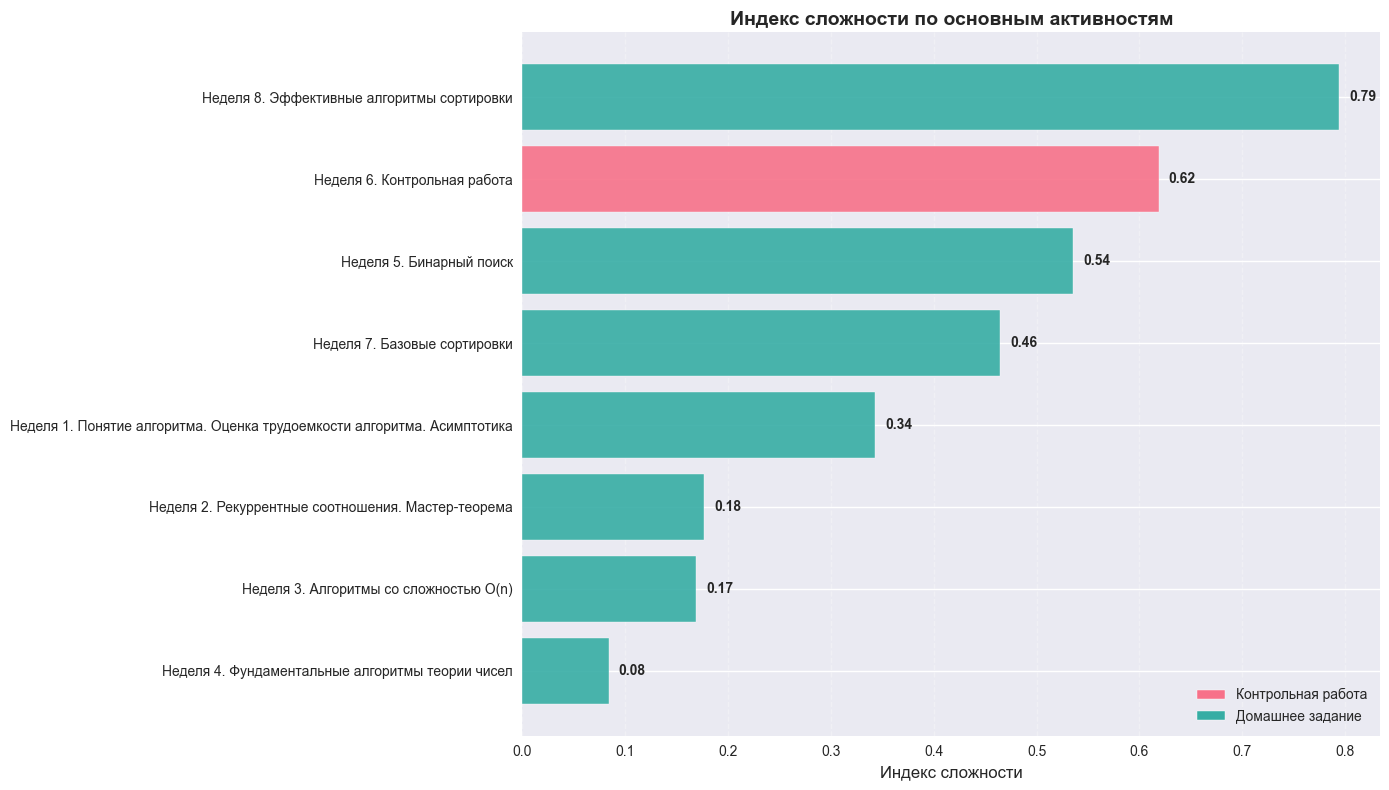

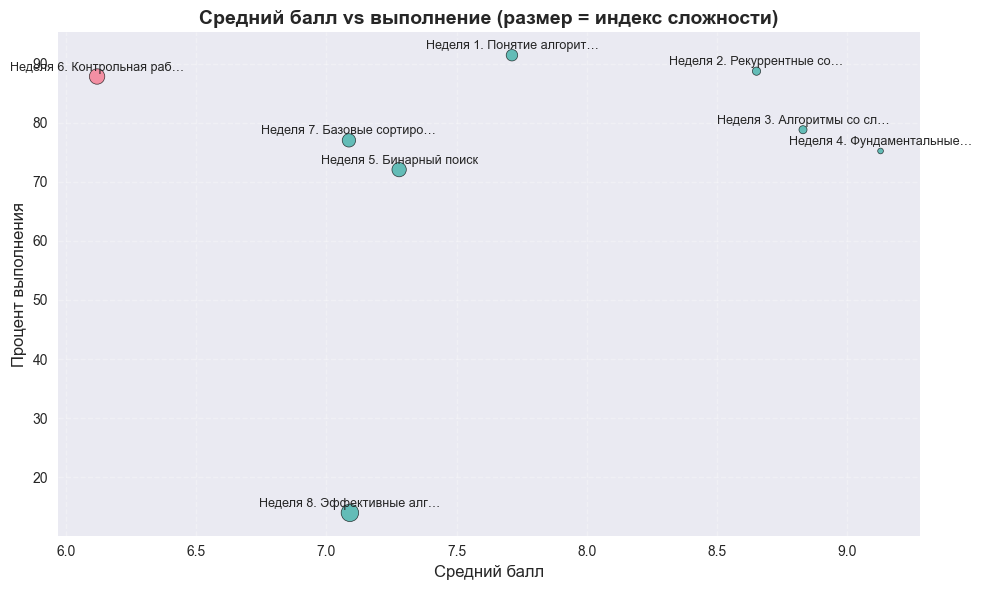

In [28]:
from matplotlib.patches import Patch

difficulty_df = analytics.get_difficulty_comparison()

if len(difficulty_df) > 0:
    available_types = difficulty_df['Тип'].unique().tolist()
    ordered_types = [t for t in getattr(analytics, 'type_order', []) if t in available_types]
    for t in available_types:
        if t not in ordered_types:
            ordered_types.append(t)

    palette = sns.color_palette("husl", len(ordered_types))
    type_colors = {t: palette[idx] for idx, t in enumerate(ordered_types)}
    type_labels = {
        t: analytics.activity_classifier.get(t, {}).get('label', t.capitalize())
        for t in ordered_types
    }

    print("=" * 80)
    print("СРАВНЕНИЕ СЛОЖНОСТИ ОСНОВНЫХ АКТИВНОСТЕЙ")
    print("=" * 80)
    print("Показатель формируется из трёх компонентов: выполнения (обратная шкала), среднего балла (обратная шкала) и разброса.")
    print("Чем выше индекс, тем более сложной выглядит активность.")

    display_columns = [
        'Активность',
        'Тип (название)',
        'Процент выполнения',
        'Средний балл',
        'Стандартное отклонение',
        'Индекс сложности'
    ]
    print(difficulty_df[display_columns].round(3).to_string(index=False))

    fig, ax = plt.subplots(figsize=(14, max(8, len(difficulty_df) * 0.5)))
    colors = [type_colors.get(row['Тип'], '#6C757D') for _, row in difficulty_df.iterrows()]
    bars = ax.barh(difficulty_df['Активность'], difficulty_df['Индекс сложности'], color=colors, alpha=0.9)
    ax.set_xlabel('Индекс сложности', fontsize=12)
    ax.set_title('Индекс сложности по основным активностям', fontsize=14, fontweight='bold')
    ax.invert_yaxis()

    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.01, bar.get_y() + bar.get_height() / 2,
                f"{width:.2f}", va='center', fontsize=10, fontweight='bold')

    legend_elements = [
        Patch(facecolor=type_colors[t], label=type_labels.get(t, t.capitalize()))
        for t in ordered_types if t in difficulty_df['Тип'].values
    ]
    if legend_elements:
        ax.legend(handles=legend_elements, loc='lower right', fontsize=10)

    ax.grid(True, axis='x', alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()

    fig, ax = plt.subplots(figsize=(10, 6))
    scatter_colors = [type_colors.get(row['Тип'], '#6C757D') for _, row in difficulty_df.iterrows()]
    scatter = ax.scatter(
        difficulty_df['Средний балл'],
        difficulty_df['Процент выполнения'],
        c=scatter_colors,
        s=200 * difficulty_df['Индекс сложности'].fillna(0.5),
        alpha=0.75,
        edgecolors='black',
        linewidth=0.5
    )
    ax.set_xlabel('Средний балл', fontsize=12)
    ax.set_ylabel('Процент выполнения', fontsize=12)
    ax.set_title('Средний балл vs выполнение (размер = индекс сложности)', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3, linestyle='--')

    for _, row in difficulty_df.iterrows():
        ax.text(row['Средний балл'], row['Процент выполнения'] + 1,
                row['Активность'][:25] + ('…' if len(row['Активность']) > 25 else ''),
                fontsize=9, ha='center')

    plt.tight_layout()
    plt.show()
else:
    print("Недостаточно данных для анализа сложности основных активностей")

## Экспорт всех метрик


In [29]:
all_metrics = analytics.get_all_metrics()

export_to_excel = False  # Установи True, если хотите экспортировать

if export_to_excel:
    output_file = 'course_analytics_report.xlsx'
    with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
        all_metrics['completion_rates'].to_excel(writer, sheet_name='Завершенность', index=False)
        all_metrics['engagement_trajectory'].to_excel(writer, sheet_name='Траектория', index=False)
        all_metrics['performance_distribution'].to_excel(writer, sheet_name='Успеваемость', index=False)
        if len(all_metrics['student_progress']) > 0:
            all_metrics['student_progress'].to_excel(writer, sheet_name='Прогресс', index=False)
        if len(all_metrics['correlations']) > 0:
            all_metrics['correlations'].to_excel(writer, sheet_name='Корреляции')
        if len(all_metrics['consistency']) > 0:
            all_metrics['consistency'].to_excel(writer, sheet_name='Консистентность', index=False)
        if len(all_metrics['difficulty_comparison']) > 0:
            all_metrics['difficulty_comparison'].to_excel(writer, sheet_name='Сложность', index=False)
        if len(all_metrics['variability_analysis']) > 0:
            all_metrics['variability_analysis'].to_excel(writer, sheet_name='Вариативность', index=False)
    
    print(f"Все метрики экспортированы в {output_file}")
else:
    print("Для экспорта результатов установи export_to_excel = True")

Для экспорта результатов установи export_to_excel = True
